In [40]:
from scipy.stats import chi2, ncx2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.size'] = 18

**Visualize the chi-2 distribution using IEEE bus-14 as an example**

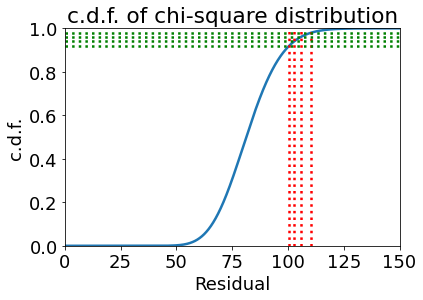

In [39]:
def find_threshold(r_range, cdf, fpr_range):
    thresholds = []
    for fpr in fpr_range:
        posi = np.argmin(np.abs(1-cdf-fpr))
        thresholds.append(r_range[posi])
    return thresholds
r_max = 150
r_range = np.arange(0,r_max,0.01)
no_mea = 2*14+4*20
no_bus = (14-1)*2
dof = no_mea - no_bus
cdf = chi2.cdf(r_range, dof)
fpr_range = np.arange(0.02,0.1,0.02)
thresholds = find_threshold(r_range, cdf, fpr_range)
plt.figure()
plt.plot(r_range, cdf)
plt.vlines(x = thresholds, ymin=0, ymax=1, linestyles='dotted', colors = 'red')
plt.hlines(y = 1-fpr_range, xmin = 0, xmax = r_max, linestyles='dotted', colors = 'green')
plt.xlim(0,r_max)
plt.ylim(0,1)
plt.xlabel('Residual')
plt.ylabel('c.d.f.')
plt.title('c.d.f. of chi-square distribution')
plt.show()

**Non-central Chi-square distribution**

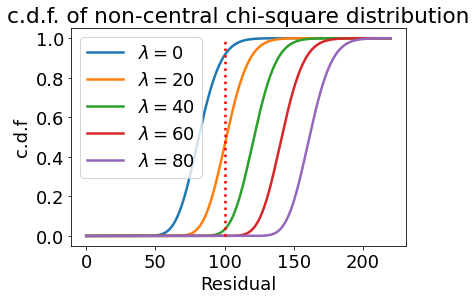

In [54]:
r_max = 220
r_range = np.arange(0,r_max,0.01)
lambda_range = np.arange(0,100,20)
plt.figure()
for idx, nc in enumerate(lambda_range):
    cdf_non = chi2.cdf(r_range, dof, nc)
    plt.plot(r_range, cdf_non, label = rf'$\lambda={lambda_range[idx]}$')
plt.xlabel('Residual')
plt.ylabel('c.d.f')
plt.vlines(x = thresholds[-1], ymin=0, ymax=1, linestyles='dotted', colors = 'red')
plt.title('c.d.f. of non-central chi-square distribution')
plt.legend()
plt.show()

**False Data Injection Attacks**

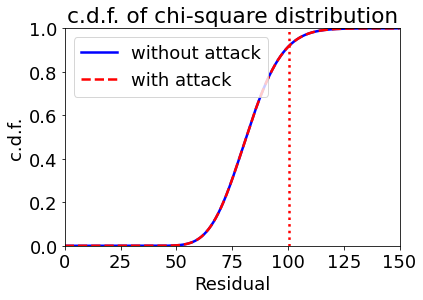

In [59]:
r_max = 150
r_range = np.arange(0,r_max,0.01)
plt.figure()
plt.plot(r_range, cdf, color = 'blue', label = 'without attack')
plt.plot(r_range, cdf, color = 'red', linestyle = 'dashed', label = 'with attack')
plt.vlines(x = thresholds[-1], ymin=0, ymax=1, linestyles='dotted', colors = 'red')
plt.xlim(0,r_max)
plt.ylim(0,1)
plt.xlabel('Residual')
plt.ylabel('c.d.f.')
plt.title('c.d.f. of chi-square distribution')
plt.legend()
plt.show()